# Sequential Learning

MVA 2021-2022

Elias Masquil: eliasmasquil@gmail.com

Nicolas Violante: nviolante96@gmail.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib

font = {
    "size": 15,
}
matplotlib.rc("font", **font)

# Part 1: Rock Paper Scissors

## 2) Simulation against a fixed adversary. 

Consider the game “Rock paper scissors” and assume that the adversary chooses qt = (1/3,1/6,1/2) and samples jt ∼qt for all rounds t ≥1

In [ ]:
def rand_weighted(prob):
    u = np.random.rand()
    if u <= prob[0]:
        return 0
    elif u <= prob[0] + prob[1]:
        return 1
    else:
        return 2


def EWA_update(prob, lr, loss):
    prob_next = prob * np.exp(- lr * loss)
    return prob_next / prob_next.sum()


def EWA_play(loss_matrix, prob_adversary, lr, num_iterations=100):
    num_actions = len(prob_adversary)
    prob_player = np.ones(num_actions) / num_actions

    probs = np.zeros((num_iterations, num_actions))
    losses = np.zeros(num_iterations)
    for t in range(num_iterations):
        action_player = rand_weighted(prob_player)
        action_adversary = rand_weighted(prob_adversary)
        loss = loss_matrix[:, action_adversary]
        prob_player = EWA_update(prob_player, lr, loss)

        probs[t] = prob_player
        losses[t] = loss_matrix[action_player, action_adversary]

    return probs, losses


loss_matrix = np.array([[0, 1, -1],
                        [-1, 0, 1],
                        [1, -1, 0]])

b) Simulate an instance of the game for t = 1,...,T = 100 for η = 1. Plot the evolution of the weight vectors
p1,p2,...,pT . What seems to be the best strategy against this adversary?

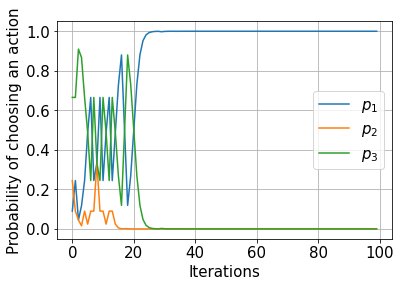

In [ ]:
num_iterations = 100
prob_adversary = np.array([1/3, 1/6, 1/2])


probs, losses = EWA_play(loss_matrix, prob_adversary, 1, num_iterations)

plt.plot(probs[:,0], label=f'$p_1$')
plt.plot(probs[:,1], label=f'$p_2$')
plt.plot(probs[:,2], label=f'$p_3$')


plt.legend()
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.grid()

c) Plot the average loss as a function of t

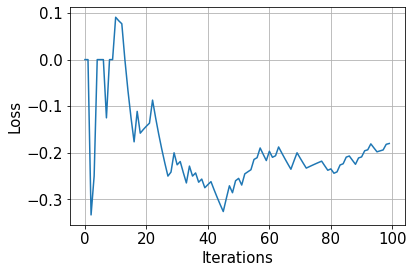

In [ ]:
plt.plot(losses.cumsum() / np.arange(1, num_iterations + 1))

plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.grid()

d) Repeat one simulation for different values of learning rates η ∈{0.01,0.05,0.1,0.5,1}. What are the best
η in practice and in theory?

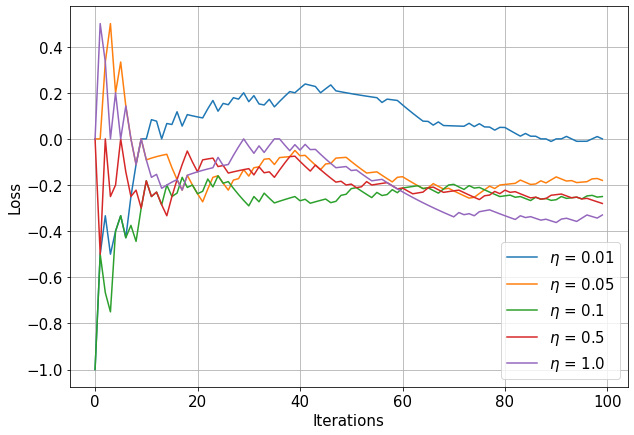

In [ ]:
num_iterations = 100
prob_adversary = np.array([1/3, 1/6, 1/2])

lrs = [0.01, 0.05, 0.1, 0.5, 1.0]
_, ax = plt.subplots(figsize=(10,7))
for lr in lrs:
     probs, losses = EWA_play(loss_matrix, prob_adversary, lr, num_iterations)
     ax.plot(losses.cumsum() / np.arange(1, num_iterations + 1), label=f'$\eta$ = {lr}')

ax.legend()
ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.grid()

## 3) Simulation against an adaptive adversary

a) Implement OGD update

In [ ]:
def projection_simplex(v, z=1):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


def OGD_update(prob_adversary, lr, loss):
    return projection_simplex(prob_adversary - lr * loss)


def OGD_play(loss_matrix, lr_ewa, lr_ogd, num_iterations=100):
    num_actions = loss_matrix.shape[0]
    prob_player = np.ones(num_actions) / num_actions
    prob_adversary = np.ones(num_actions) / num_actions

    probs_player = np.zeros((num_iterations, num_actions))
    probs_adversary = np.zeros((num_iterations, num_actions))
    losses = np.zeros(num_iterations)
    for t in range(num_iterations):
        action_player = rand_weighted(prob_player)
        action_adversary = rand_weighted(prob_adversary)
        loss = loss_matrix[:, action_adversary]
        prob_player = EWA_update(prob_player, lr_ewa, loss)
        prob_adversary = OGD_update(prob_adversary, lr_ogd, -loss)

        probs_player[t] = prob_player
        probs_adversary[t] = prob_adversary
        losses[t] = loss_matrix[action_player, action_adversary]

    return probs_player, probs_adversary, losses

b) Repeat the simulation of Question 2.b) when the adversary is choosing pt with OGD with learning parameter η = 0.05

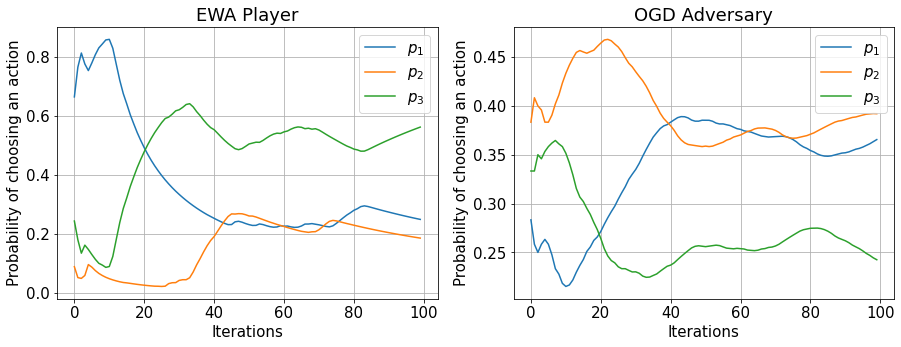

In [ ]:
num_iterations = 100
probs_player, probs_adversary, losses = OGD_play(loss_matrix, 1, 0.05, num_iterations)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(probs_player[:, 0].cumsum() / np.arange(1, num_iterations + 1), label='$p_1$')
plt.plot(probs_player[:, 1].cumsum() / np.arange(1, num_iterations + 1), label='$p_2$')
plt.plot(probs_player[:, 2].cumsum() / np.arange(1, num_iterations + 1), label='$p_3$')
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.title("EWA Player")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(probs_adversary[:, 0].cumsum() / np.arange(1, num_iterations + 1), label='$p_1$')
plt.plot(probs_adversary[:, 1].cumsum() / np.arange(1, num_iterations + 1), label='$p_2$')
plt.plot(probs_adversary[:, 2].cumsum() / np.arange(1, num_iterations + 1), label='$p_3$')
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.title("OGD Adversary")
plt.legend()
plt.grid()

c) Plot the average loss as a function of t. What strategy seems to be the best between OGD and EWA?

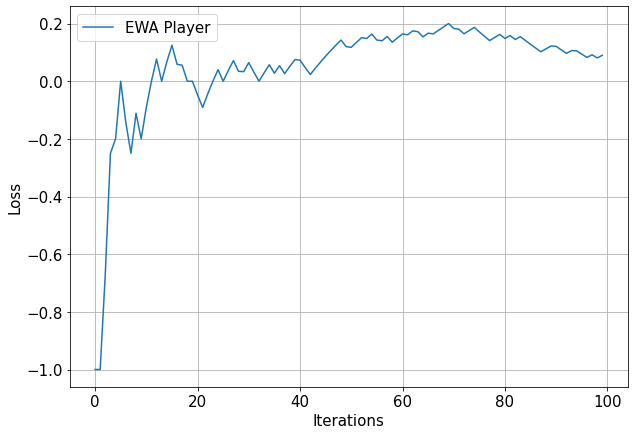

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(losses.cumsum() / np.arange(1, num_iterations + 1), label="EWA Player")
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.grid()
plt.legend()
plt.show()


d) Define  ̄$\hat{p}t$ (average of probability of the actions). Plot in log log scale $‖ ̄pt −(1/3,1/3,1/3)‖^2$ as a function of t = 1,...,10 000. What
do you observe?

In [ ]:
num_iterations = 10_000
# probs_player, probs_adversary, losses = OGD_play(loss_matrix, 0.01, 0.05, num_iterations)
probs_player, probs_adversary, losses = OGD_play(loss_matrix, 1, 0.05, num_iterations)

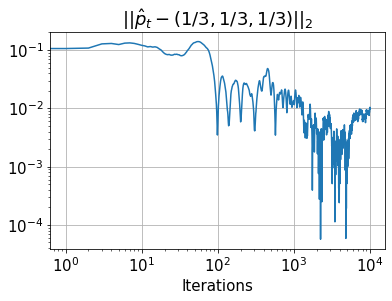

In [ ]:
plt.loglog(np.linalg.norm(np.cumsum(probs_adversary, 0) / np.arange(1, num_iterations + 1)[: , None] - np.array([1/3, 1/3, 1/3]), axis=1, ord=2))
plt.xlabel("Iterations")
plt.title("$||\hat{p}_t-(1/3, 1/3, 1/3)||_2$")
plt.grid()

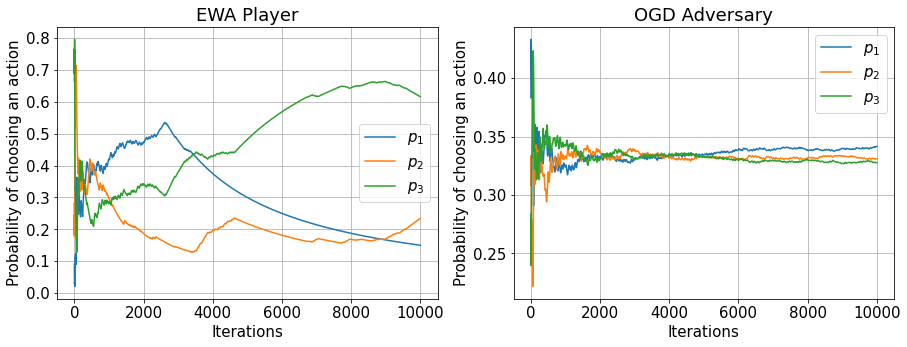

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(probs_player[:, 0].cumsum() / np.arange(1, num_iterations + 1), label='$p_1$')
plt.plot(probs_player[:, 1].cumsum() / np.arange(1, num_iterations + 1), label='$p_2$')
plt.plot(probs_player[:, 2].cumsum() / np.arange(1, num_iterations + 1), label='$p_3$')
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.title("EWA Player")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(probs_adversary[:, 0].cumsum() / np.arange(1, num_iterations + 1), label='$p_1$')
plt.plot(probs_adversary[:, 1].cumsum() / np.arange(1, num_iterations + 1), label='$p_2$')
plt.plot(probs_adversary[:, 2].cumsum() / np.arange(1, num_iterations + 1), label='$p_3$')
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.title("OGD Adversary")
plt.legend()
plt.grid()

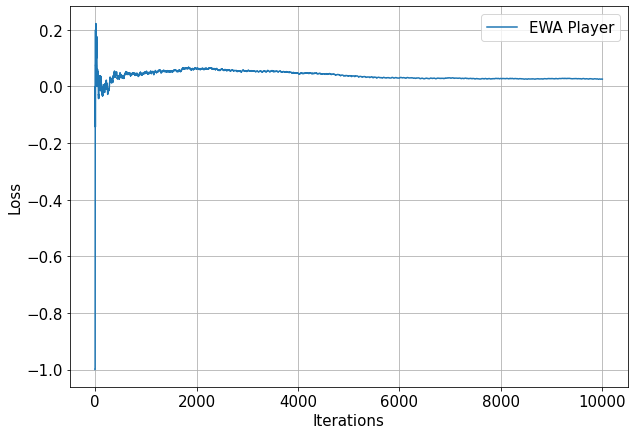

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(losses.cumsum() / np.arange(1, num_iterations + 1), label="EWA Player")
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.grid()
plt.legend()
plt.show()

## 5) Bandit feedback

In [ ]:
def EXP3_update(prob, lr, loss, action):
    g = np.zeros(len(prob))
    g[action] = loss / prob[action]
    prob_next = prob * np.exp(- lr * g)
    return prob_next / prob_next.sum()


def EXP3_play(loss_matrix, prob_adversary, lr, num_iterations=100):
    num_actions = len(prob_adversary)
    prob_player = np.ones(num_actions) / num_actions

    probs = np.zeros((num_iterations, num_actions))
    losses = np.zeros(num_iterations)
    for t in range(num_iterations):
        action_player = rand_weighted(prob_player)
        action_adversary = rand_weighted(prob_adversary)
        loss = loss_matrix[action_player, action_adversary]
        prob_player = EXP3_update(prob_player, lr, loss, action_player)

        probs[t] = prob_player
        losses[t] = loss_matrix[action_player, action_adversary]

    return probs, losses

Repeat Questions 2.b) to 2.d) with EXP3 instead of EWA

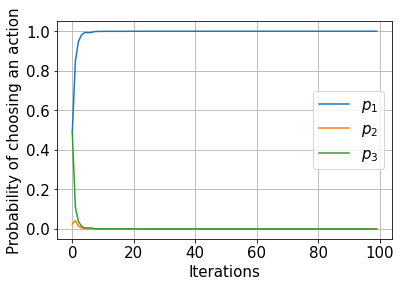

In [ ]:
num_iterations = 100
prob_adversary = np.array([1/3, 1/6, 1/2])


probs, losses = EXP3_play(loss_matrix, prob_adversary, 1, num_iterations)

plt.plot(probs[:,0], label=f'$p_1$')
plt.plot(probs[:,1], label=f'$p_2$')
plt.plot(probs[:,2], label=f'$p_3$')


plt.legend()
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.grid()

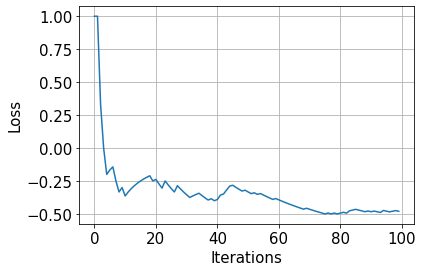

In [ ]:
plt.plot(losses.cumsum() / np.arange(1, num_iterations + 1))

plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.grid()

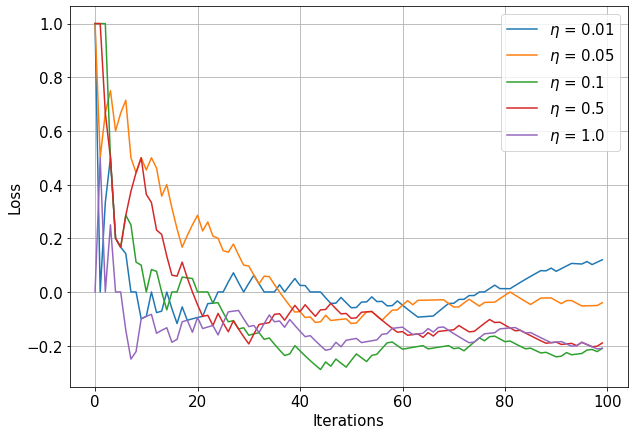

In [ ]:
num_iterations = 100
prob_adversary = np.array([1/3, 1/6, 1/2])

lrs = [0.01, 0.05, 0.1, 0.5, 1.0]
_, ax = plt.subplots(figsize=(10,7))
for lr in lrs:
     probs, losses = EXP3_play(loss_matrix, prob_adversary, lr, num_iterations)
     ax.plot(losses.cumsum() / np.arange(1, num_iterations + 1), label=f'$\eta$ = {lr}')

ax.legend()
ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.grid()

## 6) EXP3 vs UCB

In [ ]:
def select_ucb(arm_averages, t, arm_selection_counts, sigma2=1):
    ucbs = arm_averages + np.sqrt(2*sigma2*np.log(t+1) / arm_selection_counts)
    return np.argmax(ucbs)

def update_statistics(arm_averages, arm_selection_counts, selected_arm, reward):
    arm_selection_counts[selected_arm] += 1
    arm_averages[selected_arm] += (1 / arm_selection_counts[selected_arm]) * (reward - arm_averages[selected_arm])
    return arm_averages, arm_selection_counts

In [ ]:
def EXP3_vs_UCB(loss_matrix, num_actions, lr, num_iterations=100):
    prob_player = np.ones(num_actions) / num_actions

    probs = np.zeros((num_iterations, num_actions))
    losses = np.zeros(num_iterations)

    # Init UCB
    arm_averages = np.ones(num_actions)
    arm_selection_counts = np.ones(num_actions)
    
    for t in range(num_iterations):
        action_player = rand_weighted(prob_player)
        action_adversary = select_ucb(arm_averages, t, arm_selection_counts)
        loss = loss_matrix[action_player, action_adversary]
        prob_player = EXP3_update(prob_player, lr, loss, action_player)
        probs[t] = prob_player
        losses[t] = loss_matrix[action_player, action_adversary]
        
        # Update statistics of UCB
        arm_averages, arm_selection_counts = update_statistics(arm_averages, arm_selection_counts, action_adversary, loss)

    return probs, losses

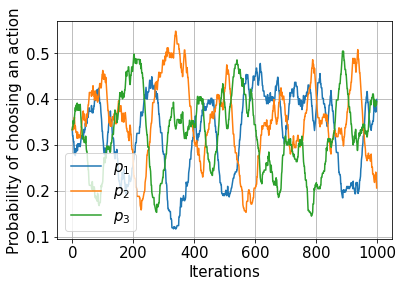

In [ ]:
num_iterations = 1000

probs, losses = EXP3_vs_UCB(loss_matrix, 3, 0.02, num_iterations)

plt.plot(probs[:,0], label=f'$p_1$')
plt.plot(probs[:,1], label=f'$p_2$')
plt.plot(probs[:,2], label=f'$p_3$')


plt.legend()
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.grid()

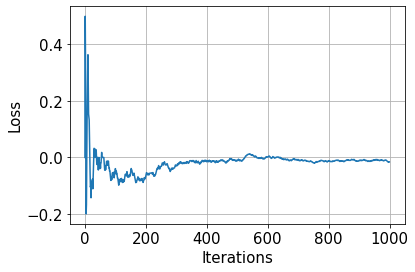

In [ ]:
plt.plot(losses.cumsum() / np.arange(1, num_iterations + 1))

plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.grid()

## 7) Prisoner's dilemma

We compare EWA and OGD in the Prisoner's dilemma

In [ ]:
def OGD_play_dilemma(loss_player, loss_adversary, lr_ewa, lr_ogd, num_iterations=100):
    num_actions = loss_player.shape[0]
    prob_player = np.ones(num_actions) / num_actions
    prob_adversary = np.ones(num_actions) / num_actions

    probs_player = np.zeros((num_iterations, num_actions))
    probs_adversary = np.zeros((num_iterations, num_actions))
    losses = np.zeros(num_iterations)
    losses_adversary = np.zeros(num_iterations)
    for t in range(num_iterations):
        action_player = rand_weighted(prob_player)
        action_adversary = rand_weighted(prob_adversary)
        loss = loss_player[:, action_adversary]
        prob_player = EWA_update(prob_player, lr_ewa, loss)
        loss_a = loss_adversary[action_player, :]
        prob_adversary = OGD_update(prob_adversary, lr_ogd, loss_a)

        probs_player[t] = prob_player
        probs_adversary[t] = prob_adversary
        losses[t] = loss_player[action_player, action_adversary]
        losses_adversary[t] = loss_adversary[action_player, action_adversary]

    return probs_player, probs_adversary, losses, losses_adversary

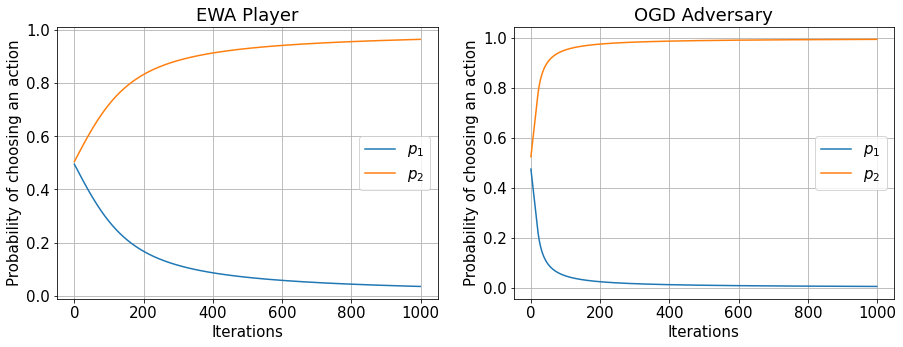

In [ ]:
num_iterations = 1000

matrix_1 = np.array([[1, 3,],
                        [0, 2],])
matrix_2 = np.array([[1, 0,],
                        [3, 2]])

probs_player, probs_adversary, losses, losses_adversary = OGD_play_dilemma(matrix_1, matrix_2, 0.02, 0.05, num_iterations)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(probs_player[:, 0].cumsum() / np.arange(1, num_iterations + 1), label='$p_1$')
plt.plot(probs_player[:, 1].cumsum() / np.arange(1, num_iterations + 1), label='$p_2$')
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.title("EWA Player")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(probs_adversary[:, 0].cumsum() / np.arange(1, num_iterations + 1), label='$p_1$')
plt.plot(probs_adversary[:, 1].cumsum() / np.arange(1, num_iterations + 1), label='$p_2$')
plt.ylabel('Probability of choosing an action')
plt.xlabel('Iterations')
plt.title("OGD Adversary")
plt.legend()
plt.grid()

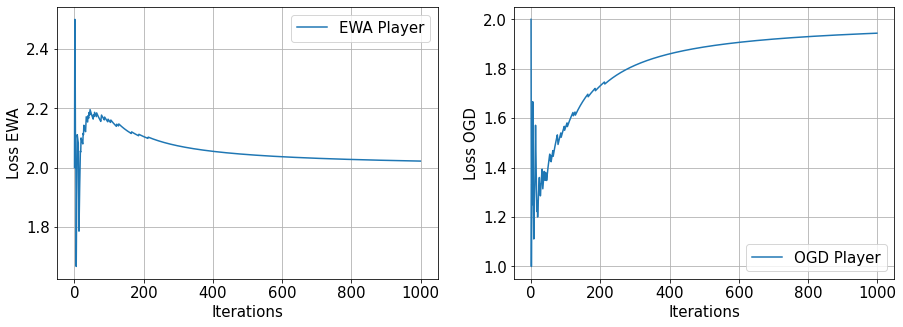

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(losses.cumsum() / np.arange(1, num_iterations + 1), label="EWA Player")
plt.ylabel('Loss EWA')
plt.xlabel('Iterations')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(losses_adversary.cumsum() / np.arange(1, num_iterations + 1), label="OGD Player")
plt.ylabel('Loss OGD')
plt.xlabel('Iterations')
plt.grid()
plt.legend()

# Part 2: Bernoulli Bandits

## 1) Follow the leader

b) Implement FTL.

In [ ]:
def update_statistics(arm_averages, arm_selection_counts, arm_variances, selected_arm, reward):
    first_variance_term = reward - arm_averages[selected_arm]
    arm_selection_counts[selected_arm] += 1
    arm_averages[selected_arm] += (1 / arm_selection_counts[selected_arm]) * (reward - arm_averages[selected_arm])
    second_variance_term = reward - arm_averages[selected_arm]
    arm_variances[selected_arm] += first_variance_term * second_variance_term
    return arm_averages, arm_selection_counts, arm_variances

In [ ]:
def select_ftl(arm_averages, **kwargs):
    return np.argmax(arm_averages)

In [ ]:
def simulate_bernoulli_bandits(arm_probas, time_horizon, selection_strategy, **kwargs):
    incremental_regret = []
    arm_averages = np.zeros_like(arm_probas)
    arm_selection_counts = np.zeros_like(arm_probas)
    arm_variances = np.zeros_like(arm_probas)
    
    # First steps we try each of the arms
    for k, p_k in enumerate(arm_probas):
        reward = np.random.rand() <= p_k
        arm_averages, arm_selection_counts, arm_variances = update_statistics(arm_averages, arm_selection_counts, arm_variances, k, reward)
    # Play
    for t in range(time_horizon):
        selection_kwargs = {
            "t": t,
            "arm_selection_counts": arm_selection_counts,
            "sigma2": kwargs.get("sigma2"),
            "arm_variances": arm_variances,
        }
        k = selection_strategy(arm_averages, **selection_kwargs)
        reward = np.random.rand() <= arm_probas[k]
        arm_averages, arm_selection_counts, arm_variances = update_statistics(arm_averages, arm_selection_counts, arm_variances, k, reward)
        incremental_regret.append(np.max(arm_probas) - arm_probas[k])
    
    return incremental_regret

c) For time T = 100, plot a histogram of the regret RT of FTL over 1000 repetitions of the experiment. Explain the figure.

In [ ]:
regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0.5, 0.6]), 100, select_ftl)
    regret = np.sum(incremental_regret)
    regrets.append(regret)

Text(0.5, 1.0, 'Histogram of the regret $R_T$ (FTL)')

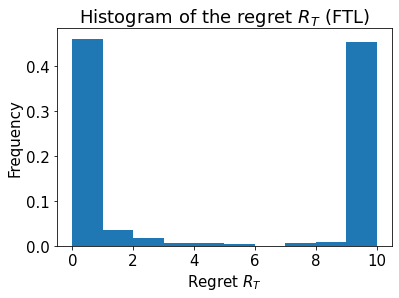

In [ ]:
plt.hist(regrets, density=True);
plt.xlabel("Regret $R_T$")
plt.ylabel("Frequency")
plt.title("Histogram of the regret $R_T$ (FTL)")

d) Plot the mean regret of FTL over 1000 repetitions, as a function of t ∈ {1,...,1000}. Is FTL a good algorithm for stochastic bandits?

In [ ]:
incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0.5, 0.6]), 1000, select_ftl)
    incremental_regrets.append(incremental_regret)

Text(0.5, 1.0, 'Average $R_T(t)$ over 1000 runs (FTL)')

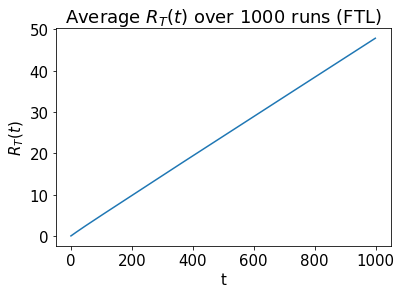

In [ ]:
regret_t_ftl = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)
plt.plot(regret_t_ftl)
plt.xlabel("t")
plt.ylabel("$R_T(t)$")
plt.title("Average $R_T(t)$ over 1000 runs (FTL)")

## 2) UCB

f) Implement UCB($\sigma^2$) algorithm

In [ ]:
def select_ucb(arm_averages, t, arm_selection_counts, sigma2, **kwargs):
    ucbs = arm_averages + np.sqrt(2*sigma2*np.log(t+1) / arm_selection_counts)
    return np.argmax(ucbs)

g) Plot the mean regret of UCB(1/4) as a function of time up to T = 1000 for K = 2, p = (0.5,0.6), over 1000
repetitions. Compare with the result of question 1.d.

In [ ]:
incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0.5, 0.6]), 1000, select_ucb, sigma2=0.25)
    incremental_regrets.append(incremental_regret)

Text(0.5, 1.0, 'Average $R_T(t)$ over 1000 runs - UCB($\\sigma^2$)')

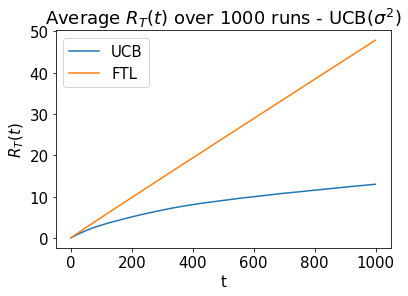

In [ ]:
regret_t_ucb = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)
plt.plot(regret_t_ucb)
plt.plot(regret_t_ftl)
plt.xlabel("t")
plt.ylabel("$R_T(t)$")
plt.legend(["UCB", "FTL"])
plt.title("Average $R_T(t)$ over 1000 runs - UCB($\sigma^2$)")

h) For K = 2, p = (0.6,0.5), T = 1000, plot the mean regret of UCB(σ2) over 1000 repetitions as a function
of σ2, for σ2 ∈ {0,1/32,1/16,1/4,1}. Do it again for p = (0.85,0.95) and compare the results: does the
optimal parameter change? How does it compare to the theoretic parameter?

In [ ]:
mean_regrets_p0 = []
mean_regrets_p1 = []
for sigma2 in [0, 1/32, 1/16, 1/4, 1]:
    incremental_regrets_p0 = []
    incremental_regrets_p1 = []
    for i in range(1000):
        incremental_regret_p0 = simulate_bernoulli_bandits(np.array([0.6, 0.5]), 1000, select_ucb, sigma2=sigma2)
        incremental_regrets_p0.append(incremental_regret_p0)

        incremental_regret_p1 = simulate_bernoulli_bandits(np.array([0.85, 0.95]), 1000, select_ucb, sigma2=sigma2)
        incremental_regrets_p1.append(incremental_regret_p1)

    incremental_regrets_p0 = np.array(incremental_regrets_p0)
    incremental_regrets_p1 = np.array(incremental_regrets_p1)

    mean_regrets_p0.append(incremental_regrets_p0.sum(axis=1).mean(axis=0))
    mean_regrets_p1.append(incremental_regrets_p1.sum(axis=1).mean(axis=0))

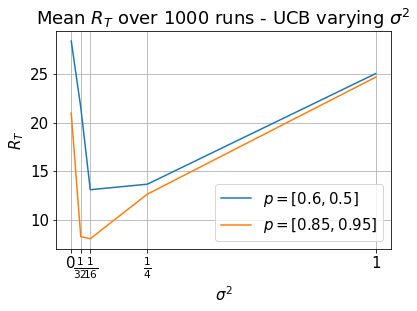

In [ ]:
plt.plot([0, 1/32, 1/16, 1/4, 1], mean_regrets_p0)
plt.plot([0, 1/32, 1/16, 1/4, 1], mean_regrets_p1)
plt.xlabel("$\sigma^2$")
plt.xticks([0, 1/32, 1/16, 1/4, 1], labels=['0', "$\\frac{1}{32}$", "$\\frac{1}{16}$", "$\\frac{1}{4}$", '1'])
plt.ylabel("$R_T$")
plt.legend(["$p=[0.6, 0.5]$", "$p=[0.85, 0.95]$"])
plt.title("Mean $R_T$ over 1000 runs - UCB varying $\sigma^2$")
plt.grid()

## 3) 

On the same figure, plot the variance of B(p) and the sub-Gaussian constant σ2(p) described above as a function
of p ∈[0,1].

In [ ]:
p = 0.1
0.5 * (p-1+p) / (np.log(p)-np.log(1-p))

0.18204784532536752

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


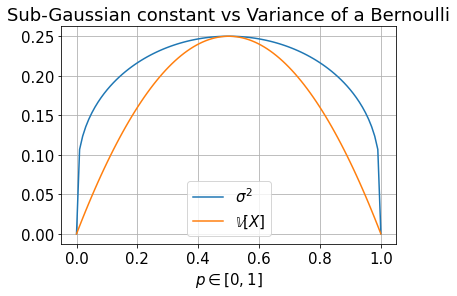

In [ ]:
sub_gaussian_constant = np.array(
    [0.5 * (p-1+p) / (np.log(p)-np.log(1-p)) for p in np.linspace(0,1,100)]
)

bernoulli_variance = np.array(
    [p*(1-p) for p in np.linspace(0,1, 100)]
)


plt.plot(np.linspace(0,1,100), sub_gaussian_constant, label="$\sigma^2$")
plt.plot(np.linspace(0,1,100), bernoulli_variance, label="$\mathbb{V}[X]$")
plt.xlabel("$p \in [0,1]$")
plt.title("Sub-Gaussian constant vs Variance of a Bernoulli")
plt.legend()
plt.grid()

## 5) UCB-V

c) Implement UCB-V.

In [ ]:
def select_ucb_v(arm_averages, t, arm_variances, arm_selection_counts, **kwords):
    b = 1
    xi = 1.1
    c = 1

    v = arm_variances / arm_selection_counts
    ucbs = arm_averages + np.sqrt((2*v*xi*np.log(t+1)) / arm_selection_counts) + 3*b*c*xi/arm_selection_counts
    return np.argmax(ucbs)

d) On the same figure, plot the mean regret of UCB-V and UCB(1/4) as a function of time up to T = 1000 for
K = 2, p = (0.5,0.6), over 1000 repetitions

In [ ]:
incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0.5, 0.6]), 1000, select_ucb_v)
    incremental_regrets.append(incremental_regret)

Text(0.5, 1.0, 'Average $R_T(t)$ over 1000 runs')

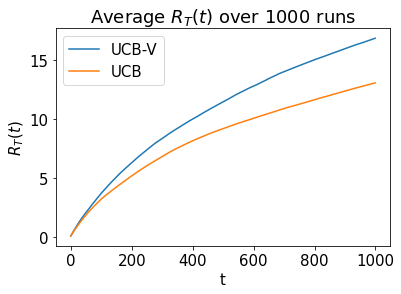

In [ ]:
regret_t_ucb_v = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)
plt.plot(regret_t_ucb_v)
plt.plot(regret_t_ucb)
plt.xlabel("t")
plt.ylabel("$R_T(t)$")
plt.legend(["UCB-V", "UCB"])
plt.title("Average $R_T(t)$ over 1000 runs")

e) Same question for p = (0.1,0.2) and p = (0,0.1). Compare to the results of 5.d. When does UCB-V improve
over UCB?

p=(0.1, 0.2)

In [ ]:
incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0.1, 0.2]), 1000, select_ucb, sigma2=0.25)
    incremental_regrets.append(incremental_regret)

regret_t_ucb = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)

incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0.1, 0.2]), 1000, select_ucb_v)
    incremental_regrets.append(incremental_regret)

regret_t_ucb_v = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)

Text(0.5, 1.0, 'Average $R_T(t)$ over 1000 runs')

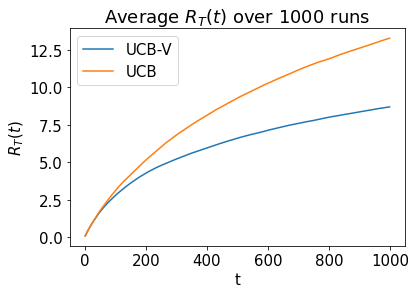

In [ ]:
plt.plot(regret_t_ucb_v)
plt.plot(regret_t_ucb)
plt.xlabel("t")
plt.ylabel("$R_T(t)$")
plt.legend(["UCB-V", "UCB"])
plt.title("Average $R_T(t)$ over 1000 runs")

p = (0,0.1)

In [ ]:
incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0, 0.1]), 1000, select_ucb, sigma2=0.25)
    incremental_regrets.append(incremental_regret)

regret_t_ucb = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)

incremental_regrets = []
for i in range(1000):
    incremental_regret = simulate_bernoulli_bandits(np.array([0, 0.1]), 1000, select_ucb_v)
    incremental_regrets.append(incremental_regret)

regret_t_ucb_v = np.array(incremental_regrets).cumsum(axis=1).mean(axis=0)

Text(0.5, 1.0, 'Average $R_T(t)$ over 1000 runs')

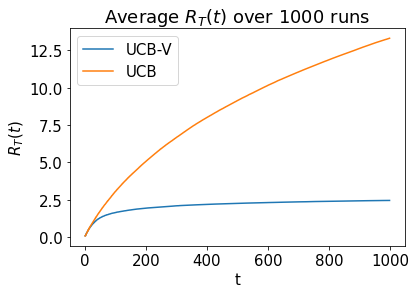

In [ ]:
plt.plot(regret_t_ucb_v)
plt.plot(regret_t_ucb)
plt.xlabel("t")
plt.ylabel("$R_T(t)$")
plt.legend(["UCB-V", "UCB"])
plt.title("Average $R_T(t)$ over 1000 runs")